In [1]:
# handling data 
import numpy as np 
import pandas as pd 

# warnings
import warnings
pd.options.mode.chained_assignment = None 
warnings.filterwarnings(action="ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

import pickle

from analyseModel import results
from hyperparameterTuning import hyperparamTraining as hpt 

In [2]:
file = open('../../data/ML_models/model_data.pkl', 'rb')
data = pickle.load(file)
file.close()

In [3]:
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']
columns = data['x_feature']

******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7494677075940384

classification report :
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



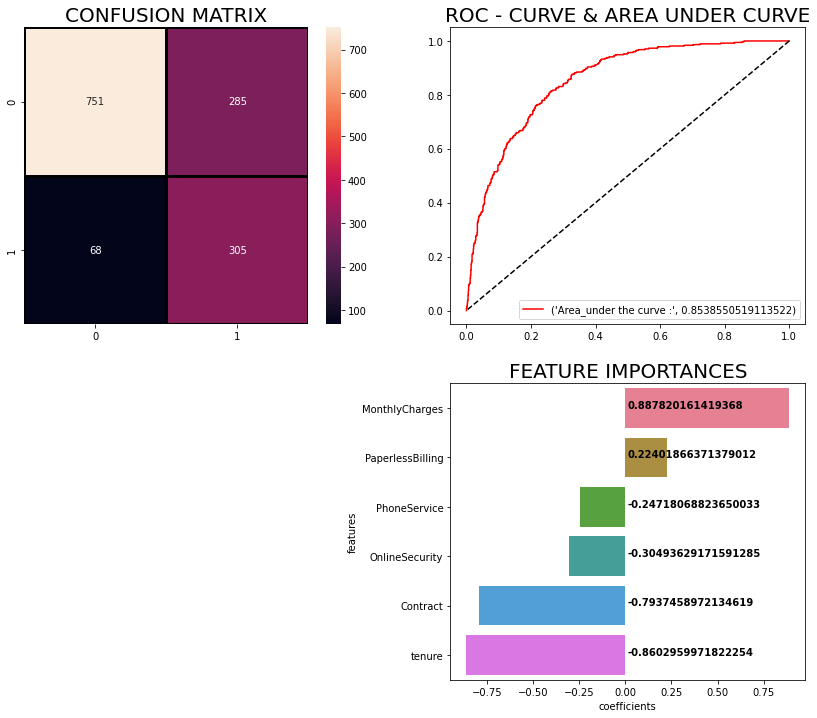

In [4]:
lr =LogisticRegression()
results(lr, x_train, y_train, x_test, y_test, "coef", columns)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=1, penalty='l1', solver='liblinear')
******************************
MODEL - OUTPUT
******************************

accuracy_score : 0.7494677075940384

classification report :
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



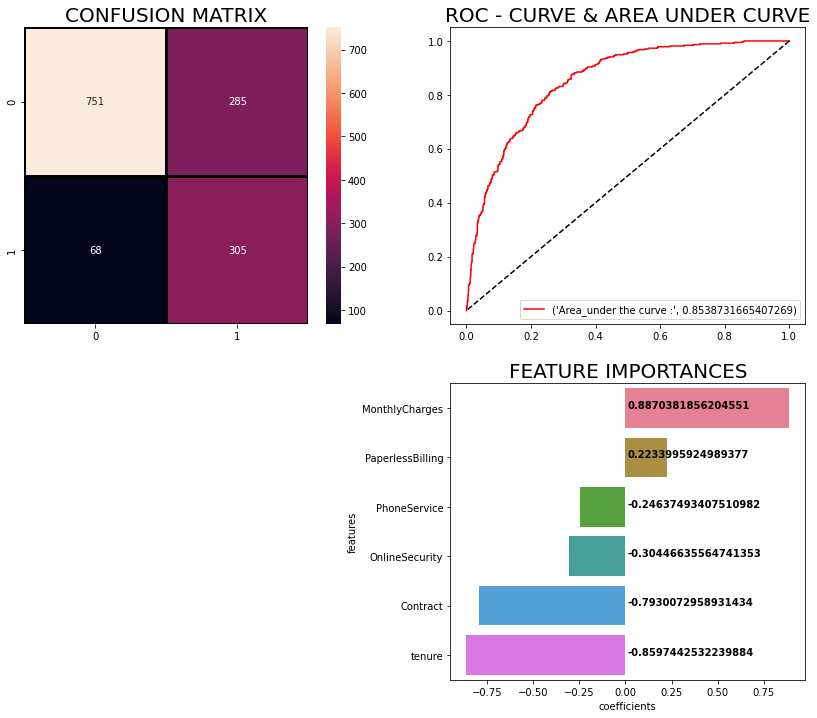

In [7]:
param = {
    'penalty' : ['l1', 'l2'], 
    'C' : [i for i in range(1, 10, 2)], 
    'solver' : ['newton-cg', 'lbfgs', 'liblinear']
}
lr =LogisticRegression()
lrModel = hpt(lr, x_train, y_train, x_test, y_test, param, "coef", columns)

In [6]:
file = open('../../data/ML_models/lrModel.pkl', 'wb')
pickle.dump(lrModel, file)